In [201]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  
from sklearn.linear_model import LinearRegression
import seaborn as sn
import statsmodels.api as sm

In [168]:
ratings = pd.read_csv('data/2018_ratings.csv', header = 0)
personality = pd.read_csv('data/2018-personality-data.csv', header = 0)

display(ratings.head())
display(personality.head())

,useri,movie_id,rating,tstamp
0,8e7cebf9a234c064b75016249f2ac65e,1,5.0,2001-09-10 17:19:56
1,8e7cebf9a234c064b75016249f2ac65e,2,4.0,2001-09-28 11:34:55
2,8e7cebf9a234c064b75016249f2ac65e,3,4.0,2001-09-28 11:42:50
3,8e7cebf9a234c064b75016249f2ac65e,5,5.0,2001-09-28 11:27:30
4,8e7cebf9a234c064b75016249f2ac65e,6,4.0,2002-01-07 18:12:02


,userid,openness,agreeableness,emotional_stability,conscientiousness,extraversion,assigned metric,assigned condition,movie_1,predicted_rating_1,...,movie_9,predicted_rating_9,movie_10,predicted_rating_10,movie_11,predicted_rating_11,movie_12,predicted_rating_12,is_personalized,enjoy_watching
0,8e7cebf9a234c064b75016249f2ac65e,5.0,2.0,3.0,2.5,6.5,serendipity,high,77658,4.410466,...,120138,4.244817,121372,4.396004,127152,4.120456,95311,4.053847,4,4
1,77c7d756a093150d4377720abeaeef76,7.0,4.0,6.0,5.5,4.0,all,default,94959,4.207280,...,56782,4.019599,5618,3.963953,969,4.174188,1232,4.334877,2,3
2,b7e8a92987a530cc368719a0e60e26a3,4.0,3.0,4.5,2.0,2.5,serendipity,medium,110501,4.868064,...,2288,4.823212,3307,4.676756,1172,4.649281,1212,4.744990,2,2
3,92561f21446e017dd6b68b94b23ad5b7,5.5,5.5,4.0,4.5,4.0,popularity,medium,2905,4.526371,...,3030,4.425689,1281,4.479921,940,4.355061,905,4.317927,3,3
4,030001ac2145a938b07e686a35a2d638,5.5,5.5,3.5,4.5,2.5,popularity,medium,2905,4.526371,...,3030,4.425689,1281,4.479921,940,4.355061,905,4.317927,2,3


In [169]:
# join table
full_data = pd.merge(ratings, personality, left_on = 'useri', right_on = 'userid')
full_data = full_data.drop(columns = ['useri'], axis = 1)
display(full_data.head())

,movie_id,rating,tstamp,userid,openness,agreeableness,emotional_stability,conscientiousness,extraversion,assigned metric,...,movie_9,predicted_rating_9,movie_10,predicted_rating_10,movie_11,predicted_rating_11,movie_12,predicted_rating_12,is_personalized,enjoy_watching
0,1,5.0,2001-09-10 17:19:56,8e7cebf9a234c064b75016249f2ac65e,5.0,2.0,3.0,2.5,6.5,serendipity,...,120138,4.244817,121372,4.396004,127152,4.120456,95311,4.053847,4,4
1,2,4.0,2001-09-28 11:34:55,8e7cebf9a234c064b75016249f2ac65e,5.0,2.0,3.0,2.5,6.5,serendipity,...,120138,4.244817,121372,4.396004,127152,4.120456,95311,4.053847,4,4
2,3,4.0,2001-09-28 11:42:50,8e7cebf9a234c064b75016249f2ac65e,5.0,2.0,3.0,2.5,6.5,serendipity,...,120138,4.244817,121372,4.396004,127152,4.120456,95311,4.053847,4,4
3,5,5.0,2001-09-28 11:27:30,8e7cebf9a234c064b75016249f2ac65e,5.0,2.0,3.0,2.5,6.5,serendipity,...,120138,4.244817,121372,4.396004,127152,4.120456,95311,4.053847,4,4
4,6,4.0,2002-01-07 18:12:02,8e7cebf9a234c064b75016249f2ac65e,5.0,2.0,3.0,2.5,6.5,serendipity,...,120138,4.244817,121372,4.396004,127152,4.120456,95311,4.053847,4,4


In [170]:
full_data.columns = [c.strip() for c in full_data.columns]
full_data.columns

Index(['movie_id', 'rating', 'tstamp', 'userid', 'openness', 'agreeableness',
       'emotional_stability', 'conscientiousness', 'extraversion',
       'assigned metric', 'assigned condition', 'movie_1',
       'predicted_rating_1', 'movie_2', 'predicted_rating_2', 'movie_3',
       'predicted_rating_3', 'movie_4', 'predicted_rating_4', 'movie_5',
       'predicted_rating_5', 'movie_6', 'predicted_rating_6', 'movie_7',
       'predicted_rating_7', 'movie_8', 'predicted_rating_8', 'movie_9',
       'predicted_rating_9', 'movie_10', 'predicted_rating_10', 'movie_11',
       'predicted_rating_11', 'movie_12', 'predicted_rating_12',
       'is_personalized', 'enjoy_watching'],
      dtype='object')

In [171]:
# check null values
full_data.isnull().sum()

movie_id               0
rating                 0
tstamp                 0
userid                 0
openness               0
agreeableness          0
emotional_stability    0
conscientiousness      0
extraversion           0
assigned metric        0
assigned condition     0
movie_1                0
predicted_rating_1     0
movie_2                0
predicted_rating_2     0
movie_3                0
predicted_rating_3     0
movie_4                0
predicted_rating_4     0
movie_5                0
predicted_rating_5     0
movie_6                0
predicted_rating_6     0
movie_7                0
predicted_rating_7     0
movie_8                0
predicted_rating_8     0
movie_9                0
predicted_rating_9     0
movie_10               0
predicted_rating_10    0
movie_11               0
predicted_rating_11    0
movie_12               0
predicted_rating_12    0
is_personalized        0
enjoy_watching         0
dtype: int64

In [292]:
print(full_data['assigned metric'].unique())
print(full_data['assigned condition'].unique())

# remove space
full_data['assigned metric'] = full_data['assigned metric'].apply(lambda x : x.strip())
full_data['assigned condition'] = full_data['assigned condition'].apply(lambda x : x.strip())

print(full_data['assigned metric'].unique())
print(full_data['assigned condition'].unique())

[' serendipity' ' all' ' popularity' ' diversity']
[' high' ' default' ' medium' ' low']
['serendipity' 'all' 'popularity' 'diversity']
['high' 'default' 'medium' 'low']


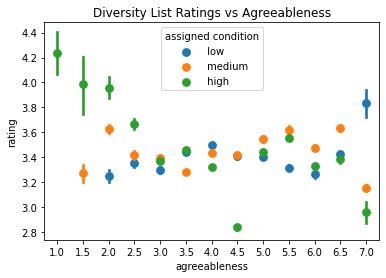

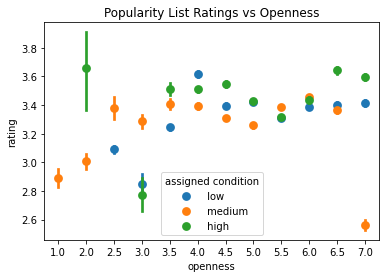

In [287]:
sn.pointplot(x = 'agreeableness', y = 'rating', data = full_data[(full_data['assigned metric'] == 'diversity')], join=False, hue = 'assigned condition', hue_order=['low', 'medium', 'high'])
plt.title('Diversity List Ratings vs Agreeableness')
plt.savefig('images/Diversity_Agreeableness.jpg')
plt.show()

sn.pointplot(x = 'openness', y = 'rating', data = full_data[(full_data['assigned metric'] == ' popularity')], join=False, hue = 'assigned condition', hue_order=['low', 'medium', 'high'])
plt.title('Popularity List Ratings vs Openness')
plt.savefig('images/Popularity_Openness.jpg')
plt.show()


No handles with labels found to put in legend.


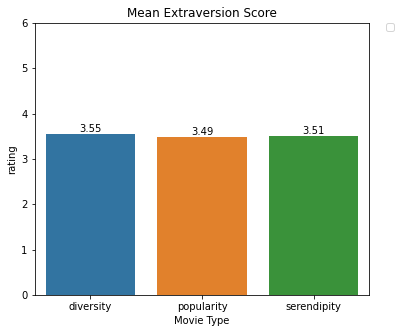

No handles with labels found to put in legend.


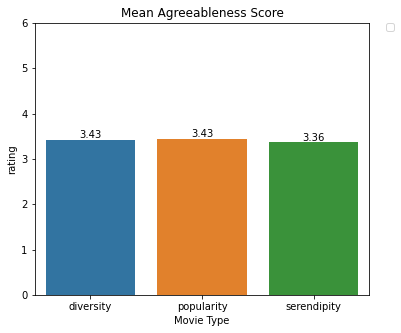

In [350]:
df_open = full_data[(full_data.extraversion > 5) ].groupby(['assigned metric']).agg('mean')['rating'].reset_index()

df_extra = full_data[full_data.agreeableness > 5].groupby(['assigned metric']).agg('mean')['rating'].reset_index()

plt.figure(figsize=(6, 5))
bp = sn.barplot(x = 'assigned metric', y = 'rating', data = df_open[df_open['assigned metric'] != 'all'], hue_order=['low', 'medium', 'high'])
plt.title('Mean Extraversion Score')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Movie Type')
plt.ylim((0,6))
for p in bp.patches:
    bp.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
plt.savefig('images/Mean Extraversion Score.jpg')
plt.show()

plt.figure(figsize=(6, 5))
bp = sn.barplot(x = 'assigned metric', y = 'rating', data = df_extra[df_extra['assigned metric'] != 'all'],  hue_order=['low', 'medium', 'high'])
plt.title('Mean Agreeableness Score')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Movie Type')
plt.ylim((0,6))
for p in bp.patches:
    bp.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
plt.savefig('images/Mean Agreeableness Score.jpg')
plt.show()

In [330]:
assigned condition

,assigned metric,openness
0,diversity,5.516979
1,popularity,5.475450
2,serendipity,5.359672


In [293]:
full_data.describe()

,movie_id,rating,openness,agreeableness,emotional_stability,conscientiousness,extraversion,movie_1,predicted_rating_1,movie_2,...,movie_9,predicted_rating_9,movie_10,predicted_rating_10,movie_11,predicted_rating_11,movie_12,predicted_rating_12,is_personalized,enjoy_watching
count,1.070203e+06,1.070203e+06,1.070203e+06,1.070203e+06,1.070203e+06,1.070203e+06,1.070203e+06,1.070203e+06,1.070203e+06,1.070203e+06,...,1.070203e+06,1.070203e+06,1.070203e+06,1.070203e+06,1.070203e+06,1.070203e+06,1.070203e+06,1.070203e+06,1.070203e+06,1.070203e+06
mean,4.189069e+04,3.365135e+00,5.364610e+00,4.199198e+00,4.587895e+00,4.696004e+00,3.411873e+00,4.762756e+04,4.325763e+00,5.341102e+04,...,4.290695e+04,4.267777e+00,4.134586e+04,4.269580e+00,4.125886e+04,4.261227e+00,4.109333e+04,4.251452e+00,3.026043e+00,3.436590e+00
std,4.853099e+04,9.995011e-01,1.054762e+00,1.181220e+00,1.365476e+00,1.268744e+00,1.438160e+00,4.742409e+04,3.985170e-01,4.774589e+04,...,4.573710e+04,4.119735e-01,4.539209e+04,4.083081e-01,4.484005e+04,4.119179e-01,4.477236e+04,3.859831e-01,1.073663e+00,1.041403e+00
min,1.000000e+00,5.000000e-01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,6.000000e+00,2.510682e+00,1.000000e+00,...,1.000000e+00,2.483215e+00,1.000000e+00,2.799538e+00,1.000000e+00,2.375510e+00,1.000000e+00,2.313341e+00,1.000000e+00,1.000000e+00
25%,2.706000e+03,3.000000e+00,4.500000e+00,3.500000e+00,3.500000e+00,4.000000e+00,2.500000e+00,2.762000e+03,4.046507e+00,3.730000e+03,...,2.360000e+03,3.965517e+00,1.704000e+03,3.971794e+00,1.945000e+03,3.968281e+00,1.262000e+03,3.963535e+00,2.000000e+00,3.000000e+00
50%,7.982000e+03,3.500000e+00,5.500000e+00,4.000000e+00,4.500000e+00,4.500000e+00,3.500000e+00,2.667400e+04,4.299324e+00,4.878000e+04,...,8.957000e+03,4.244817e+00,7.451000e+03,4.248167e+00,8.784000e+03,4.237009e+00,7.669000e+03,4.237715e+00,3.000000e+00,4.000000e+00
75%,7.834200e+04,4.000000e+00,6.000000e+00,5.000000e+00,5.500000e+00,5.500000e+00,4.500000e+00,9.730400e+04,4.563838e+00,1.005530e+05,...,9.059200e+04,4.493382e+00,8.812500e+04,4.506264e+00,8.650400e+04,4.504753e+00,8.629000e+04,4.499904e+00,4.000000e+00,4.000000e+00
max,1.981170e+05,5.000000e+00,7.000000e+00,7.000000e+00,7.000000e+00,7.000000e+00,7.000000e+00,1.407370e+05,6.563889e+00,1.364450e+05,...,1.403590e+05,6.606617e+00,1.348530e+05,7.345432e+00,1.421150e+05,6.530355e+00,1.391950e+05,6.574597e+00,5.000000e+00,5.000000e+00


In [173]:
movie_avg = full_data.groupby('movie_id').agg('mean').reset_index()
movie_avg[['rating', 'openness', 'agreeableness', 'emotional_stability', 'conscientiousness', 'extraversion']].to_csv('processed_data/personality per movie.csv', header = True, index = False)

In [174]:
avgerage_data = full_data.groupby('userid').agg('mean').reset_index()
avgerage_data[['userid', 'rating', 'openness', 'agreeableness', 'emotional_stability', 'conscientiousness', 'extraversion']].to_csv('processed_data/personality per person.csv', header = True, index = False)

In [175]:
avg_rating = pd.read_csv('processed_data/personality per person.csv')
avg_rating

,userid,rating,openness,agreeableness,emotional_stability,conscientiousness,extraversion
0,005fe8678214011d7f92e51f9a546d40,4.111111,5.5,6.0,2.0,4.5,1.0
1,0066fac81b62656f032c085d96e378f4,3.971545,4.5,4.5,2.5,4.5,4.0
2,00fa91e202f5e48aa34c05d97867fa74,3.327285,6.5,3.5,3.0,5.0,5.0
3,011aedbea90fb3b6d1e7a47526b3bee6,3.387879,5.5,4.0,3.0,1.5,2.5
4,013325441cd1755b18c58b8007646bb1,4.030303,6.5,6.5,6.0,7.0,5.0
...,...,...,...,...,...,...,...
1815,feb85d3dbf8878d745c16a431bf6396e,3.230592,4.5,4.0,6.0,7.0,3.5
1816,fefc161ac0b429fdbf6b56cc04dd4aa6,3.663102,3.5,4.0,5.0,6.5,4.5
1817,ff14f409ad4f18cfcc72d2478355464d,4.141593,5.0,4.5,6.0,7.0,4.5
1818,ff8b293ae258fe516c39acecb966dba4,3.858553,4.5,5.5,7.0,5.5,2.0


In [198]:
# df_unpivoted = avg_rating.drop(columns='userid')
df_unpivoted = avg_rating.melt(id_vars = ['userid', 'rating'], var_name='personality', value_name = 'score')
df_unpivoted

,userid,rating,personality,score
0,005fe8678214011d7f92e51f9a546d40,4.111111,openness,5.5
1,0066fac81b62656f032c085d96e378f4,3.971545,openness,4.5
2,00fa91e202f5e48aa34c05d97867fa74,3.327285,openness,6.5
3,011aedbea90fb3b6d1e7a47526b3bee6,3.387879,openness,5.5
4,013325441cd1755b18c58b8007646bb1,4.030303,openness,6.5
...,...,...,...,...
9095,feb85d3dbf8878d745c16a431bf6396e,3.230592,extraversion,3.5
9096,fefc161ac0b429fdbf6b56cc04dd4aa6,3.663102,extraversion,4.5
9097,ff14f409ad4f18cfcc72d2478355464d,4.141593,extraversion,4.5
9098,ff8b293ae258fe516c39acecb966dba4,3.858553,extraversion,2.0


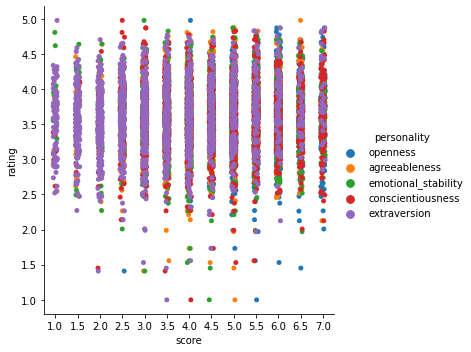

In [294]:
sn.catplot(data = df_unpivoted, x = 'score', y = 'rating', hue = 'personality')

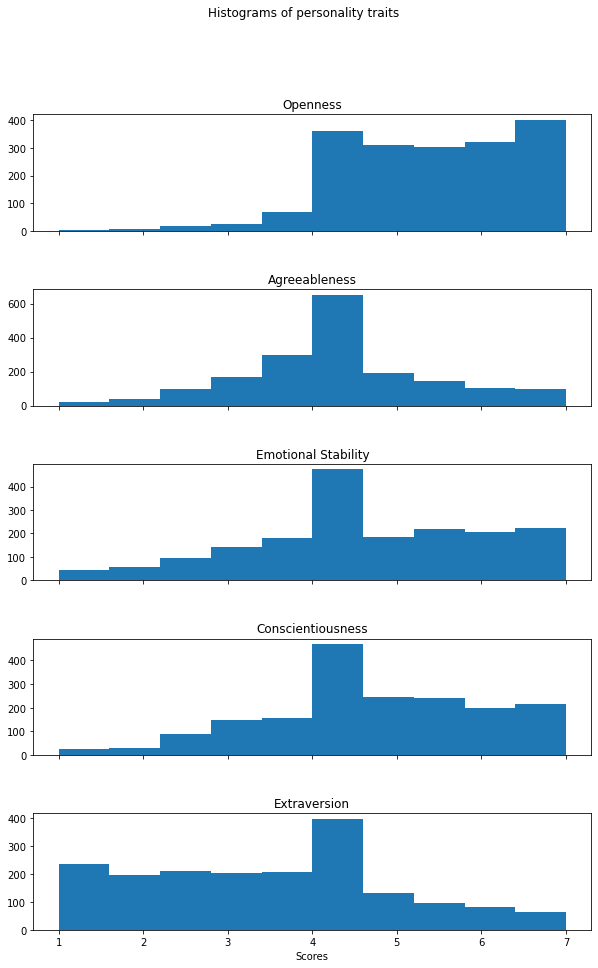

In [176]:
fig, axs = plt.subplots(5, sharex=True, figsize=(10,15), gridspec_kw={'hspace': 0.5})
fig.suptitle('Histograms of personality traits')

axs[0].hist(avg_rating.openness)
axs[0].set_title('Openness')
axs[1].hist(avg_rating.agreeableness)
axs[1].set_title('Agreeableness')
axs[2].hist(avg_rating.emotional_stability)
axs[2].set_title('Emotional Stability')
axs[3].hist(avg_rating.conscientiousness)
axs[3].set_title('Conscientiousness')
axs[4].hist(avg_rating.extraversion)
axs[4].set_title('Extraversion')
axs[4].set(xlabel='Scores')
# avg_rating.hist(['openness','agreeableness', 'emotional_stability', 'conscientiousness', 'extraversion'])
for ax in axs.flat:
    ax.label_outer()
    # ax.set(xlabel='x-label')
plt.savefig('images/Histograms of personality traits.jpg')
plt.show()

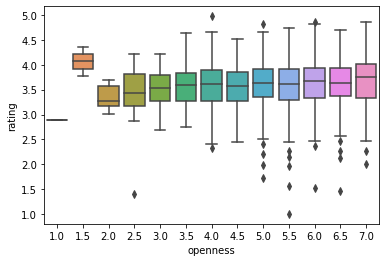

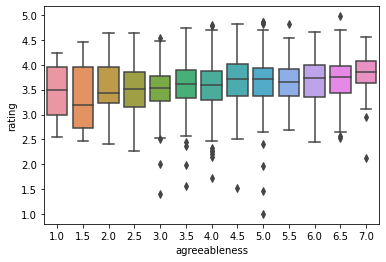

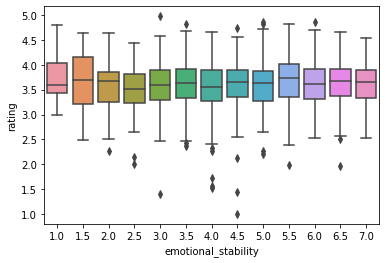

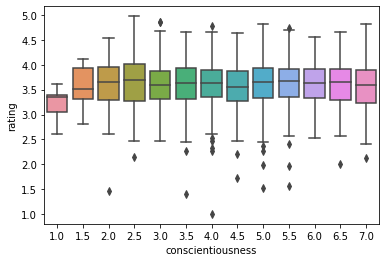

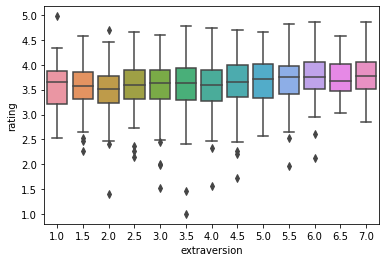

In [196]:
for p in ['openness','agreeableness', 'emotional_stability', 'conscientiousness', 'extraversion']:
    sn.boxplot(data = avg_rating, x = p, y = 'rating')
    plt.show()

In [178]:
avg_movie = pd.read_csv('processed_data/personality per movie.csv', header = 0)
avg_movie

,rating,openness,agreeableness,emotional_stability,conscientiousness,extraversion
0,3.701810,5.402832,4.239182,4.579072,4.647522,3.525570
1,3.098139,5.379019,4.205584,4.570220,4.739425,3.480541
2,2.775000,5.291667,4.220833,4.833333,4.837500,3.395833
3,2.031250,5.265625,4.343750,4.500000,4.734375,3.593750
4,2.644295,5.426174,4.322148,4.476510,4.882550,3.382550
...,...,...,...,...,...,...
35191,4.000000,5.000000,3.500000,3.000000,3.000000,5.000000
35192,3.500000,7.000000,6.000000,6.000000,4.500000,3.000000
35193,2.000000,5.000000,3.500000,3.000000,3.000000,5.000000
35194,2.500000,4.500000,3.500000,4.000000,5.000000,1.500000


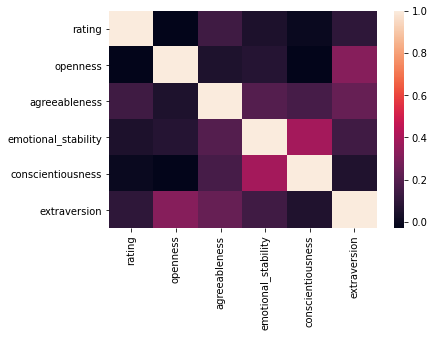

In [205]:
sn.heatmap(avg_movie.corr())


In [207]:
X2 = sm.add_constant(avg_movie.iloc[:,1:])
est = sm.OLS(avg_movie.rating, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     214.3
Date:                Wed, 09 Dec 2020   Prob (F-statistic):          5.04e-226
Time:                        10:44:28   Log-Likelihood:                -41865.
No. Observations:               35196   AIC:                         8.374e+04
Df Residuals:                   35190   BIC:                         8.379e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   2.7942    